# LGMVIP Data Science Internship

# Basic Level Task 1:Iris Flower Classification ML Project

# Partcipant Name: Dienga John Divine

# Technique:Classification

In [1]:
'''DATA ANALYSIS'''
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Reading data
iris_data_set = pd.read_csv('iris1.csv')
iris_data_set

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


(<AxesSubplot:xlabel='class'>, <AxesSubplot:ylabel='Density'>)

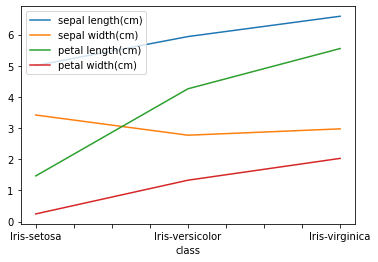

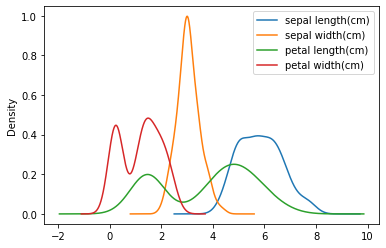

In [4]:
group=iris_data_set.groupby('class')
group.mean().plot(),iris_data_set.plot.density()


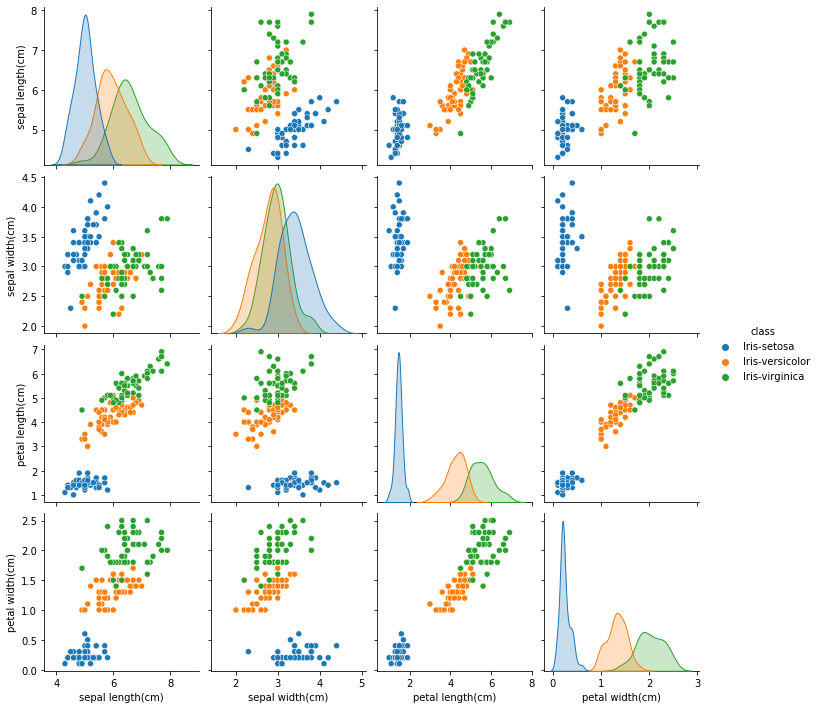

In [5]:
sb.pairplot(data=iris_data_set,hue='class')

(<AxesSubplot:>,
        sepal length(cm)  sepal width(cm)  petal length(cm)  petal width(cm)
 count        150.000000       150.000000        150.000000       150.000000
 mean           5.843333         3.054000          3.758667         1.198667
 std            0.828066         0.433594          1.764420         0.763161
 min            4.300000         2.000000          1.000000         0.100000
 25%            5.100000         2.800000          1.600000         0.300000
 50%            5.800000         3.000000          4.350000         1.300000
 75%            6.400000         3.300000          5.100000         1.800000
 max            7.900000         4.400000          6.900000         2.500000)

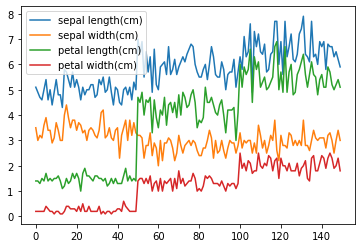

In [11]:
#data preparation
iris_data = iris_data_set[['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']]
iris_target = iris_data_set[['class']]
iris_data.plot(),iris_data_set.describe()

In [7]:
print(iris_data)
iris_target

     sepal length(cm)  sepal width(cm)  petal length(cm)  petal width(cm)
0                 5.1              3.5               1.4              0.2
1                 4.9              3.0               1.4              0.2
2                 4.7              3.2               1.3              0.2
3                 4.6              3.1               1.5              0.2
4                 5.0              3.6               1.4              0.2
..                ...              ...               ...              ...
145               6.7              3.0               5.2              2.3
146               6.3              2.5               5.0              1.9
147               6.5              3.0               5.2              2.0
148               6.2              3.4               5.4              2.3
149               5.9              3.0               5.1              1.8

[150 rows x 4 columns]


,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [12]:
category_map = {"Iris-setosa":0,'Iris-virginica':2,'Iris-versicolor':1}
iris_target=iris_target['class'].replace(category_map) 
iris_target=iris_target.to_numpy()
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
#Model building
from  sklearn.model_selection import train_test_split
iris_train,iris_test,target_train,target_test =train_test_split(iris_data,iris_target,test_size=0.3,random_state=1)
from sklearn.neighbors import KNeighborsClassifier

In [14]:
classify=KNeighborsClassifier(n_neighbors=3)
classify.fit(iris_train,target_train)
iris_predict = classify.predict(iris_test)

In [15]:
from sklearn import metrics

In [16]:
metrics.accuracy_score(target_test,iris_predict)

0.9777777777777777

In [17]:
def prediction(sample):
    iris_target_names = ['Setosa','Versicolor','Virginica']
    pred=classify.predict(sample)
    outcome=[iris_target_names[p] for p in pred]
    print('Predictions are :',outcome)

In [18]:
'''Model deployment'''
import  joblib
joblib.dump(classify,'iris-classifier.joblib')

['iris-classifier.joblib']

In [19]:
classify=joblib.load('iris-classifier.joblib')

In [20]:
#Model testing
sample=[[5,5,3,2],[2,4,3,5]]
prediction(sample)

Predictions are : ['Versicolor', 'Virginica']


In [21]:
sample2=[[10,10,1,2],[2,6,3,5]]
prediction(sample2)

Predictions are : ['Setosa', 'Virginica']


# The End